<img src='Logo_DH.png' align='left' width=35%/>

# <h1><center><ins>PROYECTO FINAL INTEGRADOR</ins></center></h1>
<h1><center><b>ANALISIS DE RIESGO CREDITICIO </b></center></h1>
<h1><center>Grupo 6</center></h1>

<div class="alert alert-block alert-info">
<b>Integrantes:</b> 

 - Adrian Rodriguez 
 - Bruno Secchiari
 - Cecilia Bocchino
 - Gabriela Sa
 - Guillermo Garbers
 - Manuel Gonzalez
    
</div>

## Sección 1 - Introducción
---

<b>Introducción</b>

A raíz de la crisis financiera de 2008, los diferentes bancos centrales han puesto énfasis en el uso de herramientas estadísticas y de recolección de datos  con el fin de impulsar las medidas de control y la adopción de las políticas establecidas por dichas entidades.

Estas medidas, han favorecido la diponibilidad de datos para su análisis y modelado que permiten ayudar a la toma de decisiones financieras.
Por lo tanto, se abre una oportunidad muy interesante para aplicar modelos de Machine Learning para el estudio del riesgo de default crediticio en una cartera de clientes determinada.

<b>Planteo del Problema</b>

Una importante entidad financiera bancaria del país contrata a nuestro equipo consultor de Data Science para analizar y resolver una problemática dentro de su departamento de créditos.

La misión consiste en llevar a cabo un estudio de los perfiles de clientes, a fin de contar con un modelo que pueda predecir la probabilidad de caer en default por incumplimientos en los pagos de las cuotas de tarjetas de crédito / líneas crediticias.

En otras palabras, necesitan contar con un modelo que les permita predicir y clasificar a los clientes con diferentes scores, para poder brindar un producto/servicio adecuado a sus posibilidades, minimizando el riesgo de caer en default por incumplimiento de pagos. 

## Sección 2 - Descripción

-------

### 2.1 Técnicas a Utilizar

La secuencia de pasos que vamos a seguir, es la siguiente:

 - <b>DataSets</b>
 - <b>Limpieza de Datos y Data Wrangling</b>
 - <b>Matriz de Features y Variable Target</b>
 - <b>Training & Test Set</b>
 - <b>Modelos de ML</b>
     * Gaussian
     * KNN
     * Decision Tree
     * Modelo de Ensamble
 - <b>Evaluacion de Modelos</b>
 - <b>Clases Desbalanceadas & Feature Selection</b>
 - <b>Pipeline + GridSearch</b>

### 2.2 Datasets

El DataSet 1 se compone de las siguientes variables:
    
*  <b>ID: </b> Número de identificación de cliente - Int64
*  <b>CODE_GENDER: </b> Variable categórica que indica: {M = Male; F = Famale} - Object
*  <b>FLAG_OWN_CAR: </b> Variable categórica que indica: {Y = Yes; N = No} - Object
*  <b>FLAG_OWN_REALITY: </b> Variable categórica que indica: {Y = Yes; N = No} - Object
*  <b>CNT_CHILDREN: </b> Variable numérica que indica la cantidad de hijos - Int64
*  <b>AMT_INCOME_TOTAL: </b> Variable numérica que indica ingreso total anual - Int64
*  <b>NAME_INCOME_TYPE: </b> Variable categórica que indica categoría proviene el ingreso {Working; Commercial associate; Pensioner; State Servant; Student} - Object
*  <b>NAME_EDUCATION_TYPE: </b> Nivel de educación {Secondary/Secondary special; Higher education; Incomplete higher; Lower secondary; Academic degree} - Object
*  <b>NAME_FAMILY_STATUS: </b> Variable categórica que indica estado civil: {Married: Single; Civil Marriage; Separated; Widow} - Object
*  <b>NAME_HOUSING_TYPE: </b> Variable cat. indica donde vive: {House/apartment; With parents; Municipal apartment; Rented apartment; Office apartment} - Object
*  <b>DAYS_BIRTH: </b> Variable numérica que indica fecha de nacimiento en días contados hacia atrás. Ejemplo: -1 = yesterday, 0=today. - float
*  <b>DAYS_EMPLOYED: </b> Variable numérica que indica dias que está empleado contados hacia atrás. Si es positivo, significa "Unemployed". - float
*  <b>FLAG_MOBILE: </b> Variable numérica binaria que indica si tiene celular: {0: no tiene, 1= tiene} - int64
*  <b>FLAG_WORK_PHONE: </b> Variable numérica que indica si tiene teléfono de trabajo: {0: no tiene, 1= tiene} - int64
*  <b>FLAG_EMAIL: </b> Variable numérica que indica si tiene email: {0: no tiene, 1= tiene} - Int64
*  <b>OCUPATION_TYPE: </b> Variable categórica que indica tipo de ocupación: {} - Object
*  <b>CANT_FAMILY_MEMBERS: </b> Variable numérica que indica cantidad de miembros de familia - Int64

El DataSet 2 se compone de las siguientes variables:

*  <b>ID: </b> Variable numérica que indica el número de identificación de cliente - Int64
*  <b>MONTHS_BALANCE: </b> Variable numérica que indica de cuantos meses es el prestamo, contados hacia atrás. - float
*  <b>STATUS: </b> Variable que indica el status de un cliente en cada mes de balance - Object.
    - C: Pagado ese mes
    - X: Sin préstamos para le mes
    - 0: 1-29 días de atraso en el pago
    - 1: 30-59 días de atraso en el pago
    - 2: 60-89 días de atraso en el pago
    - 3: 90-119 días de atraso en el pago
    - 4: 120-149 días de atraso en el pago
    - 5: +150 días de atraso en el pago


## Sección 3 - Desarrollo
---

### Sección 3.1 - Unificación de DataSets.
    1. Importamos las librerías con las que vamos a trabajar.
    2. Leemos el DataSet 1 y revisamos la información general que contiene el mismo: tamaño, tipo de datos, cantidad de valores nulos.
    3. Revisamos la cantidad de valores unicos para la variable 'ID'.
    4. Trabajamos sobre los valores nulos.
    5. Discriminamos entre variables cuantitativas y cualitativas, y trabajamos sobre las cualitativas transformandolas en datos numéricos.
    6. Re-clasificamos la variable 'STATUS' y luego agrupamos el DataFrame por 'ID'.
    7. Unimos el DataFrame 1 y el DataFrame 2 para obtener un DataFrame único que cuente con la siguiente información:
        a) Columnas: Columnas del DataFrame 1 + Columnas del DataFrame 2
        b) Filas: Un único registro por 'ID'.

In [2]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTENC

Procedemos a cargar la informacion proveniente de dos fuentes diferentes, cada unaque necesitaremos evaluar.

##### 3.1.1 - Carga de los DataSets

In [3]:
df1 = pd.read_csv('../DataSet/application_record.csv')
df2 = pd.read_csv('../DataSet/credit_record.csv')

* Usaremos diferentes métodos para comprender la informacion presente en ambos archivos.
* Los datos son complejos y ambos DataSets necesitan algún tipo de transformación antes de proceder con el análisis de los mismos.
* Los DataSets se tratarán de manera individual y luego seran compilados en un mismo DataFrame.

##### 3.1.2 - Informacion General de los DataSets

In [57]:
print(f'Tamaño del df1: {df1.shape} \n')
df1.info()

Tamaño del df1: (438557, 18) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null 

In [58]:
print(f'Tamaño del df2: {df2.shape} \n')
df2.info()

Tamaño del df2: (1048575, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


##### 3.1.3 - Cantidad de Clientes Únicos en cada DataFrame

In [59]:
# vemos cuántos clientes únicos hay en df1

print(f' Valores ID únicos en DF1: {sum(pd.value_counts(df1["ID"].unique()))} \n') # de un total 438,557. Esto significa que hay duplicados.

 Valores ID únicos en DF1: 438510 



In [60]:
# vemos cuántos clientes únicos hay en df2

print(f' Valores ID únicos en DF2: {df2["ID"].nunique()} de un total de {df2.shape[0]}') # hay duplicados

 Valores ID únicos en DF2: 45985 de un total de 1048575


In [61]:
# miremos la intersección de ambos conjuntos de datos.

len(set(df2['ID']).intersection(set(df1['ID']))) # calcula la longitud de la intersección (o elementos comunes) en ambos datasets.

36457

En principio, si quisieramos unir ambos DataFrames tendríamos un DataSet unificado por ID con **36.457** registros. Pero ahora, debemos revisar la presencia de valores nulos. Un primera aproximación puede derivarse del metodo `.info` que fue utilizado con anterioridad.

##### 3.1.4 - Valores Nulos de cada DataFrame

In [62]:
# Revisamos si hay valores nulos en df1

df1.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [63]:
# Revisamos si hay valores nulos en df2

df2.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [64]:
df1 = df1.dropna()      #elimina nulos en 'occupation_type'

In [65]:
# Checkeamos como queda df1

print("cantidad de filas en df1 despues de eliminar nulos: " + str(df1.shape[0]))

cantidad de filas en df1 despues de eliminar nulos: 304354


##### 3.1.5 - Variables Cuantitativas y Cualitativas

**DataFrame 1**

In [66]:
# Discriminamos las variables categóricas de df1 y vemos las distintas categorías y cantidades de cada variable categórica.

categorical = (df1.dtypes == 'object').values
numerical  = np.logical_not(categorical)

for i in df1.loc[:, categorical].columns:
    print(f'{i}: {df1[i].unique()}')
    print(f'{df1[i].value_counts()} \n')

CODE_GENDER: ['M' 'F']
F    190412
M    113942
Name: CODE_GENDER, dtype: int64 

FLAG_OWN_CAR: ['Y' 'N']
N    178244
Y    126110
Name: FLAG_OWN_CAR, dtype: int64 

FLAG_OWN_REALTY: ['Y' 'N']
Y    207670
N     96684
Name: FLAG_OWN_REALTY, dtype: int64 

NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
Working                 190218
Commercial associate     84012
State servant            29976
Pensioner                  136
Student                     12
Name: NAME_INCOME_TYPE, dtype: int64 

NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Secondary / secondary special    204792
Higher education                  85663
Incomplete higher                 11635
Lower secondary                    2039
Academic degree                     225
Name: NAME_EDUCATION_TYPE, dtype: int64 

NAME_FAMILY_STATUS: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow

In [67]:
# Obtenemos las variables numéricas y registramos su índice.
numerical = pd.DataFrame(df1.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
numerical = numerical[numerical['yes/no'] ==True]['index']
numerical

0                   ID
4         CNT_CHILDREN
5     AMT_INCOME_TOTAL
10          DAYS_BIRTH
11       DAYS_EMPLOYED
12          FLAG_MOBIL
13     FLAG_WORK_PHONE
14          FLAG_PHONE
15          FLAG_EMAIL
17     CNT_FAM_MEMBERS
Name: index, dtype: object

In [68]:
df1.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [69]:
# Miremos en las columnas numéricas y vemos si hay algo que necesite cambiarse.

df1[numerical].head() # vemos los valores negativos que luego los converiremos en positivo.

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0
5,5008810,0,270000.0,-19110,-3051,1,0,1,1,1.0
6,5008811,0,270000.0,-19110,-3051,1,0,1,1,1.0


In [70]:
df1['DAYS_BIRTH'] = df1['DAYS_BIRTH'].apply(lambda x: x * -1)
df1['DAYS_BIRTH']

2         21474
3         19110
4         19110
5         19110
6         19110
          ...  
438541    13510
438548    12569
438553    15939
438554     8169
438556    18858
Name: DAYS_BIRTH, Length: 304354, dtype: int64

In [71]:
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].apply(lambda x: x * -1)
df1['DAYS_EMPLOYED']

2         1134
3         3051
4         3051
5         3051
6         3051
          ... 
438541    2309
438548    2095
438553    3007
438554     372
438556    1201
Name: DAYS_EMPLOYED, Length: 304354, dtype: int64

**DataFrame 2**

In [72]:
# Reemplazamos la columna MONTHS_BALANCE por una nueva llamada MONTHS que toma los mismos valores pero positivos.
# La columna MONTHS da cuenta de hace cuantos meses se tomó el crédito.
# Los ordenamos de forma ascendente de acuerdo a ID y MONTHS.

df2['MONTHS'] = df2['MONTHS_BALANCE']*-1
df2 = df2.sort_values(['ID','MONTHS'], ascending=True)
df2.drop(['MONTHS_BALANCE'], axis=1, inplace=False)
df2.head(10)

,ID,MONTHS_BALANCE,STATUS,MONTHS
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


##### 3.1.6 - Variable Target

In [73]:
# Primero realizamos un value_Count sobre STATUS para ver cuantos valores de cada tipo.

a = df2['STATUS'].value_counts()
a

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

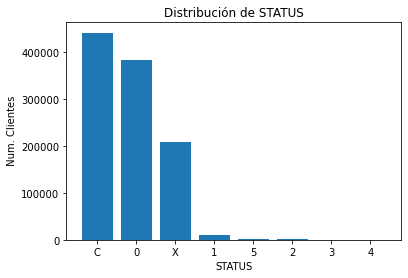

In [74]:
#Grafico la distribución inicial

x = np.arange(8)
values = a

fig, ax = plt.subplots()
plt.bar(x, values)
plt.xticks(x, ('C', '0', 'X', '1', '5', '2', '3', '4'))
plt.title('Distribución de STATUS')
plt.xlabel('STATUS')
plt.ylabel(' Num. Clientes')
plt.show()

In [75]:
# Reemplazamos los valores 0,1,2,3,4,5 con 1, ya que perteneces a la misma categoría: deudor.
# Estas serán nuestras etiquetas / resultados de la predicción para nuestro modelo.

to_replace1 = {'0': '1',
              '2': '1', 
              '3': '1',
              '4':'1',
              '5':'1'}

df2.replace(to_replace1, inplace = True)

df2['STATUS'].value_counts(normalize=True)

C    0.421554
1    0.378909
X    0.199537
Name: STATUS, dtype: float64

In [76]:
# Ahora reemplazamos los valores de C and X con 0 ya que son del mismo tipo e indican lo mismo: cliente al día.
to_replace2 = {'C': '0',
              'X':'0'}

df2.replace(to_replace2, inplace = True)

df2['STATUS'] = df2['STATUS'].apply(lambda x: int(x))

In [77]:
df2['STATUS'].value_counts(normalize=True)

0    0.621091
1    0.378909
Name: STATUS, dtype: float64

- <b>Clase 0:</b> 62%
- <b>Clase 1:</b> 37%

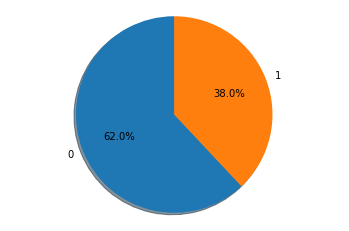

In [78]:
# Graficamos la nueva distribución de la variable STATUS

labels = '0', '1'
sizes = [0.62, 0.38]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

##### 3.1.7 - Creacion de Nuevas Variables

In [79]:
df2_group = df2.pivot_table(index = 'ID',  
                            values = 'STATUS', 
                            aggfunc = ['sum', 'count'])

df2_group

,sum,count
,STATUS,STATUS
ID,,
5001711,3,4
5001712,10,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,12,18
5150483,0,18


In [80]:
df2_group['SCORING'] = df2_group['sum']['STATUS'] / df2_group['count']['STATUS'] 

df2_group.head(3) 

,sum,count,SCORING
,STATUS,STATUS,
ID,,,
5001711,3,4,0.750000
5001712,10,19,0.526316
5001713,0,22,0.000000


In [81]:
scoring_categories, scoring_bins = pd.qcut(df2_group['SCORING'], 4, labels = ['Low', 'Medium', 'High', 'Very High'], retbins = True) 

print(f'Scoring Categories: \n{scoring_categories} \n') 

print(f'Scoring Bins: \n{scoring_bins}') 

Scoring Categories: 
ID
5001711         High
5001712         High
5001713          Low
5001714          Low
5001715          Low
             ...    
5150482         High
5150483          Low
5150484    Very High
5150485    Very High
5150487          Low
Name: SCORING, Length: 45985, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High'] 

Scoring Bins: 
[0.         0.15517241 0.42857143 0.83333333 1.        ]


In [82]:
scoring_categories.name = 'Scoring Categories' 
df2_concat = pd.concat([df2_group, scoring_categories], axis = 1) 
df2_concat.head(3) 

,"(sum, STATUS)","(count, STATUS)","(SCORING, )",Scoring Categories
ID,,,,
5001711,3,4,0.750000,High
5001712,10,19,0.526316,High
5001713,0,22,0.000000,Low


In [83]:
df2_concat.reset_index(inplace = True) 

df2_concat.head(3) 

,ID,"(sum, STATUS)","(count, STATUS)","(SCORING, )",Scoring Categories
0,5001711,3,4,0.750000,High
1,5001712,10,19,0.526316,High
2,5001713,0,22,0.000000,Low


In [84]:
df2_concat.columns = ['_'.join(column) if type(column) is tuple else column for column in df2_concat.columns.values] 

df2_concat.head(3) 

,ID,sum_STATUS,count_STATUS,SCORING_,Scoring Categories
0,5001711,3,4,0.750000,High
1,5001712,10,19,0.526316,High
2,5001713,0,22,0.000000,Low


In [85]:
df2_concat.rename(columns = {'sum_STATUS': 'Status (SUM)',  
                             'count_STATUS': 'Status (COUNT)',  
                             'SCORING_': 'Scoring'},  
                  inplace = True) 

df2_concat.head(3) 

,ID,Status (SUM),Status (COUNT),Scoring,Scoring Categories
0,5001711,3,4,0.750000,High
1,5001712,10,19,0.526316,High
2,5001713,0,22,0.000000,Low


In [86]:
df2_merge = df2.merge(df2_concat, 
                            how = 'inner', 
                            on = 'ID', 
                            suffixes = ('_1', '_2'))

df2_merge.head(3)

,ID,MONTHS_BALANCE,STATUS,MONTHS,Status (SUM),Status (COUNT),Scoring,Scoring Categories
0,5001711,0,0,0,3,4,0.75,High
1,5001711,-1,1,1,3,4,0.75,High
2,5001711,-2,1,2,3,4,0.75,High


In [87]:
# eliminamos Status SUM y Status COUNT

df2 = df2_merge.drop(columns=['Status (SUM)', 'Status (COUNT)'])

In [88]:
df2.head(10)

,ID,MONTHS_BALANCE,STATUS,MONTHS,Scoring,Scoring Categories
0,5001711,0,0,0,0.750000,High
1,5001711,-1,1,1,0.750000,High
2,5001711,-2,1,2,0.750000,High
3,5001711,-3,1,3,0.750000,High
4,5001712,0,0,0,0.526316,High
5,5001712,-1,0,1,0.526316,High
6,5001712,-2,0,2,0.526316,High
7,5001712,-3,0,3,0.526316,High
8,5001712,-4,0,4,0.526316,High
9,5001712,-5,0,5,0.526316,High


Como se observa en el DataFrame 2, aún existe un mismo numero de `ID` con diferentes valores de `STATUS`. El caso **5001711** es un buen ejemplo de esta situacion. Tanto el primer como el segundo renglón tienen valores de `STATUS` diferentes, más alla de que comparten un mismo `ID`.

Como nuestro objetivo es quedarnos con un único valor de `ID` que se corresponda con un único valor de `STATUS`, debemos transformar todos aquellas observaciones de `STATUS` que no sean casos puros de 0 ó casos puros de 1.

Para ello, una forma de hacerlo es agrupar por `ID` y corroborar la media. La media de todos los 0 será siempre 0, y la media de todos 1 será 1.
Cuando un cliente tome diferentes valores de `STATUS`, el promedio arrojará un valor entre 0 y 1. Eso indicaría que ese cliente en algún momento del préstamo no cumplió con el pago a término.

**Criterio**: Todo aquel cliente que alguna vez tuvo `STATUS` 1, sera clasificado como 1.

In [89]:
# Agrupamos por ID y vemos aquellos casos que la media (valor por default en la pivot table) es un decimal entre 0 y 1.

df2_group = df2.pivot_table(index = 'ID', values = 'STATUS')
df2_group.sort_values(['STATUS'], ascending = True)
df2_group.sample(10)

,STATUS
ID,
5115415,0.565217
5117502,0.000000
5091460,0.400000
5088286,1.000000
5090001,0.909091
5053107,0.500000
5120541,0.072727
5005028,0.964286
5010044,0.111111


Arriba vemos que existen clientes con diferentes valores de `STATUS`, ya que el promedio usado en la `pivot_table` muestra valores entre 0 y 1.
Por lo tanto, hay que utilizar algun criterio que nos permita llevarlo a 0 o a 1.

In [90]:
# Agrupamos la data en df2 por ID tomando el maximo valor de las columnas STATUS y MONTHS.
# al usar la función agg(max), aquellos ID que contengan valores en STATUS que se encuentren entre 0 y 1, lo lleva a 1. 
# lo mismo sucede con los valores de MONTHS_BALANCE, agarra el máximo.

df2 = df2.groupby('ID').agg(max).reset_index()
df2.head(10) 

,ID,MONTHS_BALANCE,STATUS,MONTHS,Scoring,Scoring Categories
0,5001711,0,1,3,0.750000,High
1,5001712,0,1,18,0.526316,High
2,5001713,0,0,21,0.000000,Low
3,5001714,0,0,14,0.000000,Low
4,5001715,0,0,59,0.000000,Low
5,5001717,0,1,21,0.772727,High
6,5001718,0,1,38,0.666667,High
7,5001719,0,1,42,0.046512,Low
8,5001720,0,1,35,1.000000,Very High
9,5001723,0,1,30,0.258065,Medium


**De esta forma, nos queda un DataFrame con un solo registro por `ID`, que a su vez, se corresponde con un único valor de `STATUS` y `MONTHS`.**

##### 3.1.8 - Unión de ambos DataFrames

In [91]:
# Unimos ambos fataframes por ID.

df = df1.join(df2.set_index('ID'), on='ID', how='inner')
df.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,MONTHS,Scoring,Scoring Categories
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,1,29,0.233333,Medium
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,1,4,0.400000,Medium
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,0,26,0.000000,Low
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,1,26,0.222222,Medium
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,1,38,0.153846,Low


In [92]:
df['STATUS'].value_counts(normalize=True)

1    0.87694
0    0.12306
Name: STATUS, dtype: float64

Una vez finalizado el proceso de Data Wrangling, se observa claramente que el DataSet contiene un problema de clases desbalanceadas. Esto se debe a que un **87%** de las observaciones pertenecen a la **Clase 1** y unicamente un **12%** a la **Clase 0**.

In [93]:
df.shape

(25134, 22)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 434812
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   25134 non-null  int64   
 1   CODE_GENDER          25134 non-null  object  
 2   FLAG_OWN_CAR         25134 non-null  object  
 3   FLAG_OWN_REALTY      25134 non-null  object  
 4   CNT_CHILDREN         25134 non-null  int64   
 5   AMT_INCOME_TOTAL     25134 non-null  float64 
 6   NAME_INCOME_TYPE     25134 non-null  object  
 7   NAME_EDUCATION_TYPE  25134 non-null  object  
 8   NAME_FAMILY_STATUS   25134 non-null  object  
 9   NAME_HOUSING_TYPE    25134 non-null  object  
 10  DAYS_BIRTH           25134 non-null  int64   
 11  DAYS_EMPLOYED        25134 non-null  int64   
 12  FLAG_MOBIL           25134 non-null  int64   
 13  FLAG_WORK_PHONE      25134 non-null  int64   
 14  FLAG_PHONE           25134 non-null  int64   
 15  FLAG_EMAIL        

### Sección 3.2 - Verificación de Outliers y Análisis Descriptivo

**Eliminación de Outliers**

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

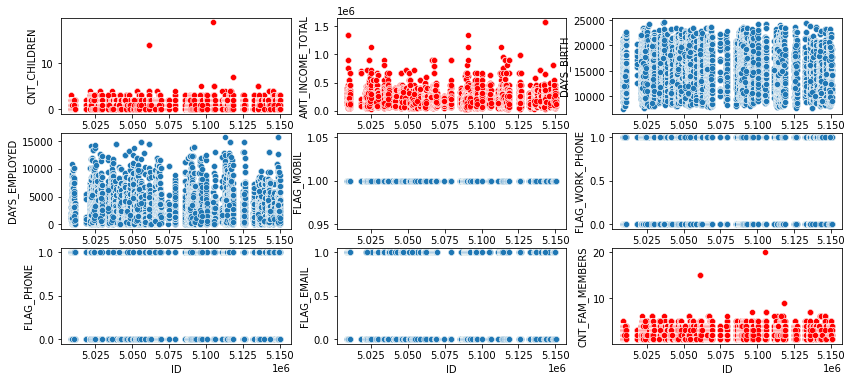

In [95]:
# Verificamos presencia de Outliers

fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=df, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=df, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df, ax=ax[2][2], color= 'red')

Observamos que las variables en rojo tienen outliers y los eliminamos

In [96]:
q_hi = df['CNT_CHILDREN'].quantile(0.999)
q_low = df['CNT_CHILDREN'].quantile(0.001)
df = df[(df['CNT_CHILDREN']>q_low) & (df['CNT_CHILDREN']<q_hi)]

In [97]:
q_hi = df['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = df['AMT_INCOME_TOTAL'].quantile(0.001)
df = df[(df['AMT_INCOME_TOTAL']>q_low) & (df['AMT_INCOME_TOTAL']<q_hi)]

In [98]:
q_hi = df['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = df['CNT_FAM_MEMBERS'].quantile(0.001)
df = df[(df['CNT_FAM_MEMBERS']>q_low) & (df['CNT_FAM_MEMBERS']<q_hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

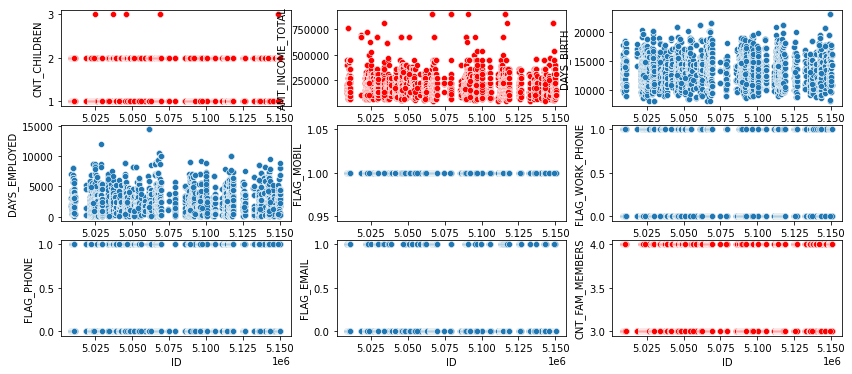

In [99]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=df, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=df, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df, ax=ax[2][2], color= 'red')

Se puede observar claramente el cambio de escala en el gráfico tras la remoción de outliers.

In [100]:
df.shape

(7761, 22)

***Observación:*** pasamos de **25134** clientes a **7761** cuando removemos outliers. Se eliminan alrededor del **70%** de los datos!

**Análisis Exploratorio**

In [101]:
# Eliminamos Scoring_Catagories

df_corr = df.drop(columns = ['Scoring Categories'])

In [102]:
# Generamos las variables dummies donde haya categóricas

df_corr = pd.get_dummies(df_corr, drop_first = True)

In [103]:
df_corr.columns.values

array(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'STATUS', 'MONTHS', 'Scoring',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Cleaning

Observemos si hay alguna correlación preliminar entre la varaible `STATUS` y el resto de las variables presentes en el DataFrame.

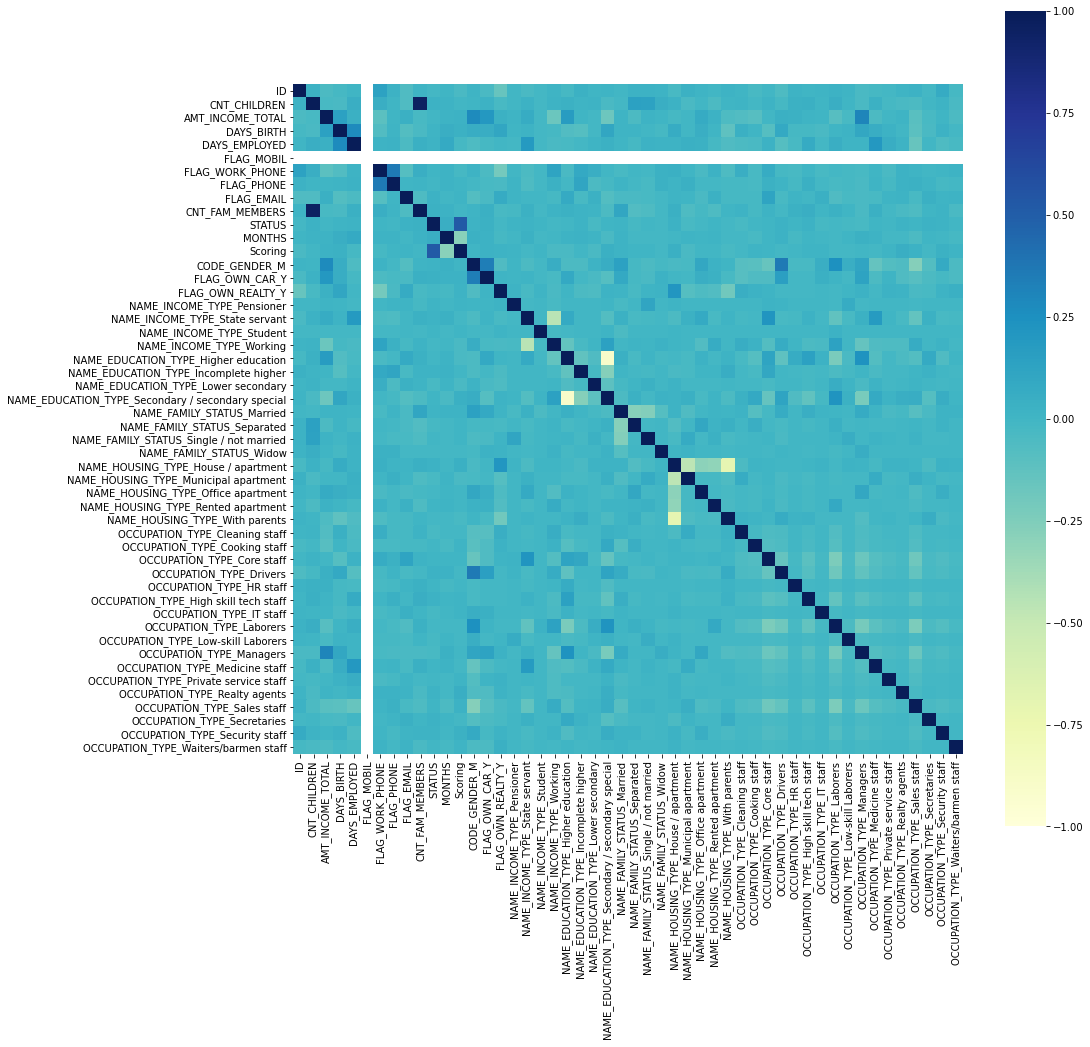

In [104]:
correlation = df_corr.corr()

plt.figure(figsize=(15,15))
axis_corr = sns.heatmap(correlation, vmin=-1, vmax=1, center=0,square=True, cmap="YlGnBu")
plt.show()

**Observación:** A priori, vemos algun tipo de correlación con la variable `Scoring`. Pero esto tiene sentido ya que esta variable fue construida a partir de la propia variable `STATUS`. Por lo tanto, no le otorgamos relevancia a esta correlación.

## Sección 4 - Modelos de Machine Learning
___

### Introducción a la Sección 4.

Hasta aquí, hemos trabajado sobre el DataSet para que el mismo pueda ser utilizado en los Modelos de Clasificación que desarrollaremos en esta sección.

<div> La sección 4 consta de 3 apartados que utilizamos para estructurar el trabajo.</div>

En el **Apartado 4.1**, entrenaremos diferentes Modelos de Clasificación de manera individual. Luego, construiremos un Modelo de Ensamble para evaluar la capacidad de predicción de todos los Modelos de Clasificiación en conjunto. En esta primera instancia, trabajaremos **sin considerar la presencia de clases desabalanceadas dentro de las categorias del vector objetivo.**

Luego, en el **Apartado 4.2**, utilizaremos el método **SMOTENC** para poder entrenar los Modelos de Clasificación nuevamente, **con la diferencia de que el conjunto de entrenamiento ahora cuenta con proporciones similares para las categories del vector objetivo.** En una última instancia, tambien haremos uso de una tecnica de **Feature Selection**, con el objetivo de reducir la dimensionalidad del DataSet en cuestión.

Por último, en el **Apartado 4.3** construiremos un **Pipeline** que abarcara los siguientes pasos: 
- (a) Selección de Features 
- (b) Normalización 
- (c) Evaluación de Modelos de Clasificación 

En una primera instancia, explotaremos el potencial de **GridSearch** para obtener la mejor combinacion de hiperparametros de los Modelos de Clasificación **KNN** y **Árbol de Decisión**.
En una segunda instancia, volveremos a usar el **GridSearch** pero esta vez para seleccionar el Modelo de Clasificación que tenga la mayor capacidad de predicción.

<img src='img_14_baby.png' align='left' width=35%/>

### 4.1 - Modelos de Clasificación VS Modelo de Ensamble

A partir del DataFrame que obtuvimos al final de la sección anterior, generamos la matriz de features `X` y el vector target `Y` . 

Luego, vamos a generar los conjuntos de entranamiento y prueba para poder trabajar en los diferentes Nodelos de Clasificación de Machine Learning.

In [105]:
# Generamos las variables dummies para aquellos valores categóricos.

df_dummies = pd.get_dummies(df, drop_first=True)

In [106]:
# Armamos las matrices X e Y.

X = df_dummies.drop(columns = ['STATUS', 
                               'Scoring', 
                               'Scoring Categories_Medium', 
                               'Scoring Categories_High', 
                               'Scoring Categories_Very High'])
print(f'X - Shape: {X.shape}')

y = df_dummies['STATUS']
print(f'Y - Shape: {y.shape} \n')



# Generamos los conjuntos de entrenamiento y testeo.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(f'X Training - Percentage: {X_train.shape[0] / X.shape[0]:.0%}')
print(f'X Testing - Percentage: {X_test.shape[0] / X.shape[0]:.0%}')

X - Shape: (7761, 48)
Y - Shape: (7761,) 

X Training - Percentage: 75%
X Testing - Percentage: 25%


Eliminamos cualquier diferencia de escala que pueda existir entre las diferentes columnas del DataSet.

In [107]:
# Normalizamos los valores de X usando la clase StandardScaler.

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ahora que tenemos los conjuntos de `X` e `Y`, procedemos a entrenar cada uno de los Modelos de Clasificación:

- GaussianNB
- KNN
- Decesion Tree
- Modelo de Ensamble (Combinando los 3 Modelos de Clasificación)
- Modelo de Ensamble (Combinando 2 de los 3 Modelos de Clasificación)

#### GaussianNB

              precision    recall  f1-score   support

           0       0.12      1.00      0.21       227
           1       0.96      0.01      0.03      1714

    accuracy                           0.13      1941
   macro avg       0.54      0.50      0.12      1941
weighted avg       0.86      0.13      0.05      1941

Area bajo la curva ROC: 0.5781 

Area bajo la curva Precision-Recall: 0.9078 



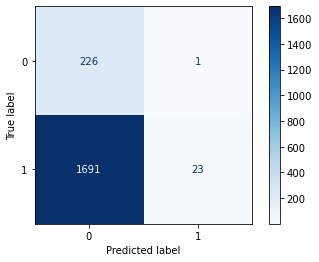

In [111]:
# Instanciamos en modelo
# Ajustamos / Entrenamos
# Predecimos.
# Calculamos la matriz de confusión, el AUC, y el AUC Presicion-Recall.


gaussian = GaussianNB()

gaussian_train = gaussian.fit(X_train_scaled, y_train)
gaussian_predict = gaussian_train.predict(X_test_scaled)
y_proba = gaussian.predict_proba(X_test_scaled)

print(classification_report(y_test, gaussian_predict))
    
print(f'Area bajo la curva ROC: {np.round(roc_auc_score(y_test,y_proba[:,1]),4)} \n')
    
precision, recall,threshold = precision_recall_curve(y_test,y_proba[:,1]);

print(f'Area bajo la curva Precision-Recall: {np.round(auc(recall,precision),4)} \n')

plot_confusion_matrix(gaussian,X_test_scaled,y_test,cmap='Blues');


#### KNN

              precision    recall  f1-score   support

           0       0.49      0.26      0.34       227
           1       0.91      0.96      0.94      1714

    accuracy                           0.88      1941
   macro avg       0.70      0.61      0.64      1941
weighted avg       0.86      0.88      0.87      1941

Area bajo la curva ROC: 0.7196 

Area bajo la curva Precision-Recall: 0.9559 



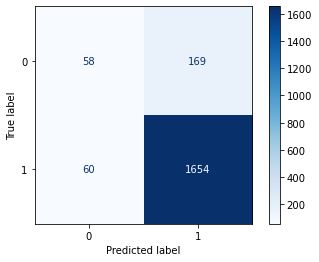

In [112]:
# Instanciamos en modelo
# Ajustamos / Entrenamos
# Predecimos.
# Calculamos la matriz de confusión, el AUC, y el AUC Presicion-Recall.

knn = KNeighborsClassifier()

knn_train = knn.fit(X_train_scaled, y_train)
knn_predict = knn_train.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)

print(classification_report(y_test, knn_predict))
    
print(f'Area bajo la curva ROC: {np.round(roc_auc_score(y_test, y_proba[:,1]),4)} \n')
    
precision, recall,threshold = precision_recall_curve(y_test, y_proba[:,1]);

print(f'Area bajo la curva Precision-Recall: {np.round(auc(recall,precision),4)} \n')

plot_confusion_matrix(knn, X_test_scaled, y_test, cmap='Blues');

#### Árbol de Decisión

              precision    recall  f1-score   support

           0       0.33      0.38      0.36       227
           1       0.92      0.90      0.91      1714

    accuracy                           0.84      1941
   macro avg       0.63      0.64      0.63      1941
weighted avg       0.85      0.84      0.84      1941

Area bajo la curva ROC: 0.6412 

Area bajo la curva Precision-Recall: 0.9525 



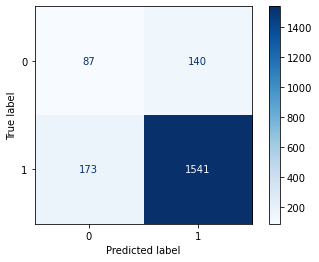

In [113]:
# Instanciamos en modelo
# Ajustamos / Entrenamos
# Predecimos.
# Calculamos la matriz de confusión, el AUC, y el AUC Presicion-Recall.


decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')

decision_tree_train = decision_tree.fit(X_train_scaled, y_train)
decision_tree_predict = decision_tree_train.predict(X_test_scaled)
y_proba_dt = decision_tree.predict_proba(X_test_scaled)

print(classification_report(y_test, decision_tree_predict))
    
print(f'Area bajo la curva ROC: {np.round(roc_auc_score(y_test, y_proba_dt[:,1]),4)} \n')
    
precision, recall,threshold = precision_recall_curve(y_test, y_proba_dt[:,1]);
print(f'Area bajo la curva Precision-Recall: {np.round(auc(recall,precision),4)} \n')

plot_confusion_matrix(decision_tree, X_test_scaled, y_test, cmap='Blues');


#### Modelo de Ensamble (Gaussian, KNN, Árbol de Decisión)

In [114]:
from scipy.stats import mode

In [115]:
# Creamos una función que nos permita ensambler los 3 modelos anteriores.

def assemble_model(x, model_1, model_2, model_3):
    prediction_1 = model_1.predict(x)
    prediction_2 = model_2.predict(x)
    prediction_3 = model_3.predict(x)
    prediction = mode([prediction_1, prediction_2, prediction_3]).mode
    prediction = np.transpose(prediction) 
    return prediction

assemble_model_predict = assemble_model(X_test_scaled, 
                                        gaussian_train, 
                                        knn_train, 
                                        decision_tree_train)

print(f'Confusion Matrix - Training: \n {confusion_matrix(y_test, assemble_model_predict)} \n')
print(f'Accuracy Score: {accuracy_score(y_test, assemble_model_predict):.0%}')

Confusion Matrix - Training: 
 [[ 104  123]
 [ 202 1512]] 

Accuracy Score: 83%


Observamos que el Modelo de Ensamble no necesariamente funciona mejor que los 3 Modelos de Clasificación de forma individual.

Ahora probaremos como se comparta el Modelo de Ensamble, pero combinando unicamente de a 2 Modelos de Clasificación en cada ejecucion. De esta forma, tambien podremos descartar que no exista una combinación de 2 Modelos de Clasificación que tenga una mayor capacidad de predicción.

In [116]:
def assemble_model(x, model_1, model_2):
    prediction_1 = model_1.predict(x)
    prediction_2 = model_2.predict(x)
    prediction = mode([prediction_1, prediction_2]).mode
    prediction = np.transpose(prediction) 
    return prediction

## ----- Gaussian/KNN -----

assemble_model_predict = assemble_model(X_test_scaled, 
                                        gaussian_train, 
                                        knn_train)

print(f'----- Gaussian/KNN ----- \n')
print(f'Confusion Matrix - Training: \n {confusion_matrix(y_test, assemble_model_predict)} \n')
print(f'Accuracy Score: {accuracy_score(y_test, assemble_model_predict):.0%} \n')
print(f'------------------------ \n')

## ----- Gaussian/Tree -----

assemble_model_predict = assemble_model(X_test_scaled, 
                                        gaussian_train, 
                                        decision_tree_train)

print(f'----- Gaussian/Tree ----- \n')
print(f'Confusion Matrix - Training: \n {confusion_matrix(y_test, assemble_model_predict)} \n')
print(f'Accuracy Score: {accuracy_score(y_test, assemble_model_predict):.0%} \n')
print(f'------------------------- \n')

## ----- KNN/Tree -----

assemble_model_predict = assemble_model(X_test_scaled, 
                                        knn_train, 
                                        decision_tree_train)

print(f'----- KNN/Tree ----- \n')
print(f'Confusion Matrix - Training: \n {confusion_matrix(y_test, assemble_model_predict)} \n')
print(f'Accuracy Score: {accuracy_score(y_test, assemble_model_predict):.0%} \n')
print(f'---------------------')

----- Gaussian/KNN ----- 

Confusion Matrix - Training: 
 [[ 226    1]
 [1691   23]] 

Accuracy Score: 13% 

------------------------ 

----- Gaussian/Tree ----- 

Confusion Matrix - Training: 
 [[ 226    1]
 [1693   21]] 

Accuracy Score: 13% 

------------------------- 

----- KNN/Tree ----- 

Confusion Matrix - Training: 
 [[ 104  123]
 [ 204 1510]] 

Accuracy Score: 83% 

---------------------


**Primera Conclusión:** El modelo KNN es el que arroja mejor **Accuracy**.

---
#### Apéndice
##### ¿Qué pasa si tambien incluimos las variables `Scoring` y `Scoring Categories` dentro de la Matriz de Features `X`?

In [117]:
X_scoring = df_dummies.drop(columns = ['STATUS'])
print(f'X - Shape: {X.shape}')

y_scoring = df_dummies['STATUS']
print(f'Y - Shape: {y.shape} \n')

X_train_scoring, X_test_scoring, y_train_scoring, y_test_scoring = train_test_split(X_scoring, y_scoring, random_state = 1)
print(f'X Training - Percentage: {X_train_scoring.shape[0] / X_scoring.shape[0]:.0%}')
print(f'X Testing - Percentage: {X_test_scoring.shape[0] / X_scoring.shape[0]:.0%}')

X - Shape: (7761, 48)
Y - Shape: (7761,) 

X Training - Percentage: 75%
X Testing - Percentage: 25%


In [118]:
scaler = StandardScaler()

X_train_scoring_scaled = scaler.fit_transform(X_train_scoring)
X_test_scoring_scaled = scaler.transform(X_test_scoring)

#### Gaussian - Incluyendo 'Scoring' y 'Scoring Categories'

In [119]:
gaussian = GaussianNB()

gaussian_train = gaussian.fit(X_train_scoring_scaled, y_train)
gaussian_predict = gaussian_train.predict(X_test_scoring_scaled)

print(f'Confusion Matrix - Training: \n {confusion_matrix(y_test_scoring, gaussian_predict)} \n')
print(f'Accuracy Score: {accuracy_score(y_test_scoring, gaussian_predict):.0%}')

Confusion Matrix - Training: 
 [[ 226    1]
 [   0 1714]] 

Accuracy Score: 100%


#### KNN - Incluyendo 'Scoring' y 'Scoring Categories'

In [120]:
knn = KNeighborsClassifier()

knn_train = knn.fit(X_train_scoring_scaled, y_train)
knn_predict = knn_train.predict(X_test_scoring_scaled)

print(f'Confusion Matrix - Training: \n {confusion_matrix(y_test_scoring, knn_predict)} \n')
print(f'Accuracy Score: {accuracy_score(y_test_scoring, knn_predict):.0%}')

Confusion Matrix - Training: 
 [[ 111  116]
 [  63 1651]] 

Accuracy Score: 91%


#### Árbol de Decisión - Incluyendo 'Scoring' y 'Scoring Categories'

In [121]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')

decision_tree_train = decision_tree.fit(X_train_scoring_scaled, y_train)
decision_tree_predict = decision_tree_train.predict(X_test_scoring_scaled)

print(f'Confusion Matrix - Training: \n {confusion_matrix(y_test_scoring, decision_tree_predict)} \n')
print(f'Accuracy Score: {accuracy_score(y_test_scoring, decision_tree_predict):.0%}')

Confusion Matrix - Training: 
 [[ 227    0]
 [   0 1714]] 

Accuracy Score: 100%


**Nota Final**
Como puede observarse facilmente, al incluir las variables `Scoring` y `Scoring Categories` tanto el primer como el tercer modelo llegan a una capacidad de prediccion del 100%. Esto se debe a que nuestra variable target, `STATUS`, se encuentra estrechamente relacionada con ellas. En consecuencia, las demas variables que se encuentran dentro de la Matriz de Features `X` pierden importancia y son dejadas de lado. Lo que es mas, las predicciones comienzan a ser realizadas casi en su totalidad en funcion de estas dos nuevas variables. Por este motivo, decidimos excluirlas en los siguientes pasos.

---

### 4.2 - Herramientas de Pre-Procesamiento

#### 4.2.1 Balanceo de Clases

In [122]:
# Partimos del df original, sin las dummies para poder trabajar con la técnica SMOTENC.

X_unbalanced = df.drop(columns = ['STATUS', 
                                  'Scoring', 
                                  'Scoring Categories'])
print(f'X - Shape: {X.shape}')

y_unbalanced = df['STATUS']
print(f'Y - Shape: {y.shape} \n')



# Separamos en train y test

X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X_unbalanced, y_unbalanced, random_state = 1)
print(f'X Training - Percentage: {X_train_unbalanced.shape[0] / X_unbalanced.shape[0]:.0%}')
print(f'X Testing - Percentage: {X_test_unbalanced.shape[0] / X_unbalanced.shape[0]:.0%}')

X - Shape: (7761, 48)
Y - Shape: (7761,) 

X Training - Percentage: 75%
X Testing - Percentage: 25%


In [123]:
# Observamos la distribución de calses en Y desbalanceada

print(f'Absolute: \n{y_train_unbalanced.value_counts(normalize = False)} \n')
print(f'Relative: \n{y_train_unbalanced.value_counts(normalize = True)}')

Absolute: 
1    5082
0     738
Name: STATUS, dtype: int64 

Relative: 
1    0.873196
0    0.126804
Name: STATUS, dtype: float64


Puede observarse con claridad que existe un problema de **Clases Desbalanceadas**, dado que alrededor de un **88%** de las observaciones de la variable `STATUS` pertenecen a la Clase 1 y unicamente el **12%** de las observaciones pertenecen a la Clase 0. Es por ello que podemos hacer uso de `SMOTENC` para igualar la cantidad de observaciones que pertenecen a una y otra clase, y de esta manera, evitar incurrir en problemas al momento de la realizar las predicciones.

In [124]:
# Identificamos las columnas categóricas de numéricas para trabajar con SMOTENC

categorical = (X_train_unbalanced.dtypes == 'object').values
numerical = np.logical_not(categorical)

smotenc = SMOTENC(categorical_features = categorical, sampling_strategy = 0.75)

X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train_unbalanced, y_train_unbalanced)

print(f'Absolute: \n{y_train_resampled.value_counts(normalize = False)} \n')
print(f'Relative: \n{y_train_resampled.value_counts(normalize = True)} \n')
print(f'Ratio: \n{(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum():.2f}')

Absolute: 
1    5082
0    3811
Name: STATUS, dtype: int64 

Relative: 
1    0.571461
0    0.428539
Name: STATUS, dtype: float64 

Ratio: 
0.75


Observamos que las clases ahora están mas balanceadas: 
- Clase 1: **57%** 
- Clase 0: **43%**

In [125]:
# Codificamos las variables categóricas

one_hot_encoder = OneHotEncoder(drop = 'first', sparse = False)

# ----- X Training -----

X_train_dummies = one_hot_encoder.fit_transform(X_train_resampled.loc[:, categorical])

X_train_dummies = pd.DataFrame(X_train_dummies)
X_train_dummies.columns = [x for category in one_hot_encoder.categories_ for x in category[1:]]

X_train_resampled = X_train_resampled.loc[:, numerical].join(X_train_dummies)

# ----- X Testing -----

X_test_dummies = one_hot_encoder.transform(X_test_unbalanced.loc[:, categorical])

X_test_dummies = pd.DataFrame(X_test_dummies)
X_test_dummies.index = X_test.index
X_test_dummies.columns = [x for category in one_hot_encoder.categories_ for x in category[1:]]

X_test_resampled = X_test_unbalanced.loc[:, numerical].join(X_test_dummies)

print(f'X Training - Shape: {X_train_resampled.shape}')
print(f'X Testing - Shape: {X_test_resampled.shape}')

X Training - Shape: (8893, 48)
X Testing - Shape: (1941, 48)


In [126]:
# Normalizamos usando la instancia de la clase StandardScaler

scaler = StandardScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test_resampled)

Ahora estamos en condiciones de volver a entrenar los Modelos de Clasificación.

#### Gaussian - Clases Balanceadas

              precision    recall  f1-score   support

           0       0.12      0.91      0.21       227
           1       0.88      0.09      0.16      1714

    accuracy                           0.18      1941
   macro avg       0.50      0.50      0.18      1941
weighted avg       0.79      0.18      0.16      1941

Area bajo la curva ROC: 0.5 

Area bajo la curva Precision-Recall: 0.9415 



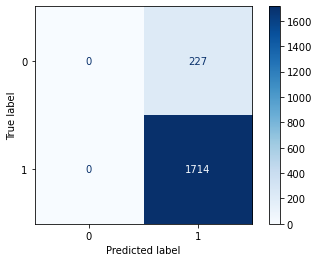

In [127]:
gaussian = GaussianNB()

gaussian_train = gaussian.fit(X_train_resampled_scaled, y_train_resampled)
gaussian_predict = gaussian_train.predict(X_test_resampled_scaled)
y_proba = gaussian.predict_proba(X_test_scaled)


print(classification_report(y_test, gaussian_predict))
    
print(f'Area bajo la curva ROC: {np.round(roc_auc_score(y_test,y_proba[:,1]),4)} \n')
    
precision, recall,threshold = precision_recall_curve(y_test,y_proba[:,1]);

print(f'Area bajo la curva Precision-Recall: {np.round(auc(recall,precision),4)} \n')

plot_confusion_matrix(gaussian,X_test_scaled,y_test,cmap='Blues');

#### KNN - Clases Balanceadas

              precision    recall  f1-score   support

           0       0.29      0.36      0.32       227
           1       0.91      0.89      0.90      1714

    accuracy                           0.82      1941
   macro avg       0.60      0.62      0.61      1941
weighted avg       0.84      0.82      0.83      1941

Area bajo la curva ROC: 0.6989 

Area bajo la curva Precision-Recall: 0.9498 



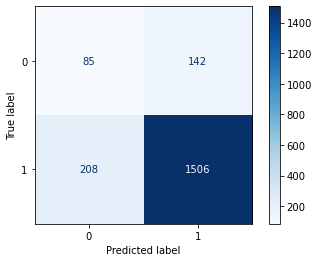

In [128]:
knn = KNeighborsClassifier()

knn_train = knn.fit(X_train_resampled_scaled, y_train_resampled)
knn_predict = knn_train.predict(X_test_resampled_scaled)
y_proba = knn.predict_proba(X_test_scaled)


print(classification_report(y_test, knn_predict))
    
print(f'Area bajo la curva ROC: {np.round(roc_auc_score(y_test, y_proba[:,1]),4)} \n')
    
precision, recall,threshold = precision_recall_curve(y_test, y_proba[:,1]);

print(f'Area bajo la curva Precision-Recall: {np.round(auc(recall,precision),4)} \n')

plot_confusion_matrix(knn, X_test_scaled, y_test, cmap='Blues');

#### Árbol de Decisión - Clases Balanceadas

              precision    recall  f1-score   support

           0       0.30      0.34      0.32       227
           1       0.91      0.89      0.90      1714

    accuracy                           0.83      1941
   macro avg       0.61      0.62      0.61      1941
weighted avg       0.84      0.83      0.84      1941

Area bajo la curva ROC: 0.548 

Area bajo la curva Precision-Recall: 0.918 



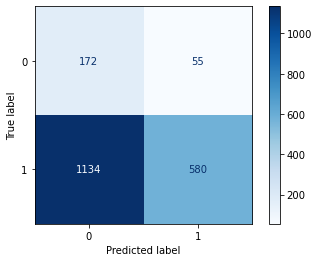

In [129]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')

decision_tree_train = decision_tree.fit(X_train_resampled_scaled, y_train_resampled)
decision_tree_predict = decision_tree_train.predict(X_test_resampled_scaled)
y_proba_dt = decision_tree.predict_proba(X_test_scaled)


print(classification_report(y_test, decision_tree_predict))
    
print(f'Area bajo la curva ROC: {np.round(roc_auc_score(y_test, y_proba_dt[:,1]),4)} \n')
    
precision, recall,threshold = precision_recall_curve(y_test, y_proba_dt[:,1]);
print(f'Area bajo la curva Precision-Recall: {np.round(auc(recall,precision),4)} \n')

plot_confusion_matrix(decision_tree, X_test_scaled, y_test, cmap='Blues');

**Observación:** Como puede observarse, la capacidad de prediccion de los modelos no es necesariamente mejor luego de aplicar `SMOTENC` sobre los conjuntos de entrenamiento y prueba.

#### 4.2.2 Feature Selection

In [130]:
def select_kbest_features(dataframe, target, k = 1):
    feature_selector = SelectKBest(f_classif, k = k)    
    _ = feature_selector.fit(dataframe.drop(target, axis = 1), dataframe[target])
    
    feature_scores = pd.DataFrame()
    feature_scores["Attribute"] = dataframe.drop(target, axis=1).columns
    feature_scores["F Score"] = feature_selector.scores_
    feature_scores["P Value"] = feature_selector.pvalues_
    feature_scores["Support"] = feature_selector.get_support()
    
    return feature_scores

kbest_features = select_kbest_features(df_dummies, 'STATUS', k = 10)
kbest_features = kbest_features.sort_values(["F Score", "P Value"], ascending = [False, False])
kbest_features.head(14)

C:\Users\mgonz290\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\mgonz290\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Attribute,F Score,P Value,Support
11,Scoring,2851.319052,0.000000e+00,True
51,Scoring Categories_Very High,402.885303,2.086772e-87,True
50,Scoring Categories_High,389.047972,1.532854e-84,True
49,Scoring Categories_Medium,383.480219,2.188541e-83,True
10,MONTHS,17.571250,2.798136e-05,True
9,CNT_FAM_MEMBERS,8.570884,3.425738e-03,True
13,FLAG_OWN_CAR_Y,7.969467,4.769408e-03,True
37,OCCUPATION_TYPE_High skill tech staff,7.238138,7.152377e-03,True
32,OCCUPATION_TYPE_Cleaning staff,7.107039,7.694094e-03,True
41,OCCUPATION_TYPE_Managers,7.048487,7.949422e-03,True


Aqui puede verse lo que habiamos explicado anteriormente de que las variables de `Scoring` y `Scoring Categories` se encuentran estrechamente relacionados con la variable `STATUS`.

Por una cuestion de simplificar la ejecucion del Pipeline, realizaremos una reduccion de la dimensionalidad del DataSet. En este sentido, incluiremos en la Matriz de Features `X` unicamente las 10 variables mas representativas para con la Variable Objetivo `Y`.

### 4.3 - Pipeline

#### 4.3.1 - Construcción del Pipeline

Comenzando armando una lista con aquellas columnas que fueron detectadas a traves de la tecnica de **Feature Selection**.

In [131]:
# Genero el vector de columnas
columns = ['MONTHS', 
           'CNT_FAM_MEMBERS', 
           'FLAG_OWN_CAR_Y', 
           'OCCUPATION_TYPE_High skill tech staff', 
           'OCCUPATION_TYPE_Cleaning staff', 
           'OCCUPATION_TYPE_Managers', 
           'NAME_HOUSING_TYPE_Municipal apartment', 
           'NAME_HOUSING_TYPE_House / apartment', 
           'NAME_EDUCATION_TYPE_Lower secondary', 
           'OCCUPATION_TYPE_Secretaries']

X[columns].head(3)

,MONTHS,CNT_FAM_MEMBERS,FLAG_OWN_CAR_Y,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Managers,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_House / apartment,NAME_EDUCATION_TYPE_Lower secondary,OCCUPATION_TYPE_Secretaries
29,39,3.0,0,0,0,1,0,1,0,0
30,13,3.0,0,0,0,1,0,1,0,0
31,55,3.0,0,0,0,1,0,1,0,0


In [132]:
# Creamos una clase para seleccionar las columnas y transformarlas

class Selector(BaseEstimator, TransformerMixin):
    
    def __init__(self, selection):
        self.selection = selection
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x, y = None):
        return x[self.selection]
    
selector = Selector(columns)
selector.fit_transform(df_dummies).head(3)

,MONTHS,CNT_FAM_MEMBERS,FLAG_OWN_CAR_Y,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Managers,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_House / apartment,NAME_EDUCATION_TYPE_Lower secondary,OCCUPATION_TYPE_Secretaries
29,39,3.0,0,0,0,1,0,1,0,0
30,13,3.0,0,0,0,1,0,1,0,0
31,55,3.0,0,0,0,1,0,1,0,0


In [133]:
# Creamos los pasos del pipeline e instanciamos.

steps = [('Feature_Engineering', selector), 
        ('Pre_Processing', StandardScaler()), 
        ('Modeling', knn)]

pipeline = Pipeline(steps)

Ahora, haremos uso del poder combinado de **Pipeline** y **GridSearch** para buscar la mejor combinación de herramientas a utilizar al momento del modelaje. Esto se refiere tanto a herramientas de prepocesamiento como a hiperparametros del Modelo de Clasificación utilizado.

#### 4.3.2 - Elección de Hiperparámetros

##### KNN

In [134]:
cv = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

param_grid = [{'Feature_Engineering': [selector, None], 
               'Pre_Processing': [MinMaxScaler(), StandardScaler(), None], 
               'Modeling': [knn], 
               'Modeling__n_neighbors': range(2, 20, 2), 
               'Modeling__weights': ['uniform','distance']}]

grid_search = GridSearchCV(pipeline, param_grid, cv = cv)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('Feature_Engineering',
                                        Selector(selection=['MONTHS',
                                                            'CNT_FAM_MEMBERS',
                                                            'FLAG_OWN_CAR_Y',
                                                            'OCCUPATION_TYPE_High '
                                                            'skill tech staff',
                                                            'OCCUPATION_TYPE_Cleaning '
                                                            'staff',
                                                            'OCCUPATION_TYPE_Managers',
                                                            'NAME_HOUSING_TYPE_Municipal '
                                                            'apartment',
                                                            'N

In [135]:
print(f'\033[1mBest Estimator:\033[0m {grid_search.best_estimator_} \n')
print(f'\033[1mBest Parameters:\033[0m {grid_search.best_params_} \n')
print(f'\033[1mTraining Performance:\033[0m {grid_search.best_score_:.2%} \n')
print(f'\033[1mTesting Performance:\033[0m {grid_search.best_estimator_.score(X_test, y_test):.2%}')

Best Estimator: Pipeline(steps=[('Feature_Engineering', None),
                ('Pre_Processing', MinMaxScaler()),
                ('Modeling',
                 KNeighborsClassifier(n_neighbors=16, weights='distance'))]) 

Best Parameters: {'Feature_Engineering': None, 'Modeling': KNeighborsClassifier(n_neighbors=16, weights='distance'), 'Modeling__n_neighbors': 16, 'Modeling__weights': 'distance', 'Pre_Processing': MinMaxScaler()} 

Training Performance: 87.77% 

Testing Performance: 87.84%


##### Árbol de Decisión

In [136]:
cv = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

param_grid = [{'Feature_Engineering': [selector, None], 
               'Pre_Processing': [MinMaxScaler(), StandardScaler(), None], 
               'Modeling': [decision_tree], 
               'Modeling__criterion': ['gini', 'entropy'], 
               'Modeling__max_depth': range(1, 20, 2)}]

grid_search = GridSearchCV(pipeline, param_grid, cv = cv)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('Feature_Engineering',
                                        Selector(selection=['MONTHS',
                                                            'CNT_FAM_MEMBERS',
                                                            'FLAG_OWN_CAR_Y',
                                                            'OCCUPATION_TYPE_High '
                                                            'skill tech staff',
                                                            'OCCUPATION_TYPE_Cleaning '
                                                            'staff',
                                                            'OCCUPATION_TYPE_Managers',
                                                            'NAME_HOUSING_TYPE_Municipal '
                                                            'apartment',
                                                            'N

In [137]:
print(f'\033[1mBest Estimator:\033[0m {grid_search.best_estimator_} \n')
print(f'\033[1mBest Parameters:\033[0m {grid_search.best_params_} \n')
print(f'\033[1mTraining Performance:\033[0m {grid_search.best_score_:.2%} \n')
print(f'\033[1mTesting Performance:\033[0m {grid_search.best_estimator_.score(X_test, y_test):.2%}')

Best Estimator: Pipeline(steps=[('Feature_Engineering',
                 Selector(selection=['MONTHS', 'CNT_FAM_MEMBERS',
                                     'FLAG_OWN_CAR_Y',
                                     'OCCUPATION_TYPE_High skill tech staff',
                                     'OCCUPATION_TYPE_Cleaning staff',
                                     'OCCUPATION_TYPE_Managers',
                                     'NAME_HOUSING_TYPE_Municipal apartment',
                                     'NAME_HOUSING_TYPE_House / apartment',
                                     'NAME_EDUCATION_TYPE_Lower secondary',
                                     'OCCUPATION_TYPE_Secretaries'])),
                ('Pre_Processing', MinMaxScaler()),
                ('Modeling', DecisionTreeClassifier(max_depth=1))]) 

Best Parameters: {'Feature_Engineering': Selector(selection=['MONTHS', 'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR_Y',
                    'OCCUPATION_TYPE_High skill tech staff',
                 

#### 4.3.3 - Elección del Mejor Modelo de Clasificación

Tambien podemos hacer uso de **Pipeline** y **GridSearch** para buscar el Modelo de Clasificación o la combinacion de Modelos de Clasificación que tenga mayor capacidad de predicion dentro del problema de negocio elegido.

In [138]:
best_knn = KNeighborsClassifier(n_neighbors = 16, weights = 'distance')
best_decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 1)

cv = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

param_grid = [{'Feature_Engineering': [selector, None], 
               'Pre_Processing': [MinMaxScaler(), StandardScaler(), None], 
               'Modeling': [gaussian, best_knn, best_decision_tree]}]

grid_search = GridSearchCV(pipeline, param_grid, cv = cv)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('Feature_Engineering',
                                        Selector(selection=['MONTHS',
                                                            'CNT_FAM_MEMBERS',
                                                            'FLAG_OWN_CAR_Y',
                                                            'OCCUPATION_TYPE_High '
                                                            'skill tech staff',
                                                            'OCCUPATION_TYPE_Cleaning '
                                                            'staff',
                                                            'OCCUPATION_TYPE_Managers',
                                                            'NAME_HOUSING_TYPE_Municipal '
                                                            'apartment',
                                                            'N

In [139]:
print(f'\033[1mBest Estimator:\033[0m {grid_search.best_estimator_} \n')
print(f'\033[1mBest Parameters:\033[0m {grid_search.best_params_} \n')
print(f'\033[1mTraining Performance:\033[0m {grid_search.best_score_:.2%} \n')
print(f'\033[1mTesting Performance:\033[0m {grid_search.best_estimator_.score(X_test, y_test):.2%}')

Best Estimator: Pipeline(steps=[('Feature_Engineering', None),
                ('Pre_Processing', MinMaxScaler()),
                ('Modeling',
                 KNeighborsClassifier(n_neighbors=16, weights='distance'))]) 

Best Parameters: {'Feature_Engineering': None, 'Modeling': KNeighborsClassifier(n_neighbors=16, weights='distance'), 'Pre_Processing': MinMaxScaler()} 

Training Performance: 87.77% 

Testing Performance: 87.84%


<img src="img_23_conclusion.jpg" align='left' width=35%/>

## Sección 5 - Conclusiones Finales
---

A lo largo de toda esta Notebook, fuimos aplicando varias de las técnicas aprendidas durante el curso para resolver un problema en particular de riesgo crediticio.
Comenzmos comprendiendo la estructura de los DataSets (forma, tipo de información, presencia de valores nulos, etc.) con el fin de poder unirlos y realizar un análisis exploratorio inicial.

Una vez logrado el DataFrame sobre el cual vamos a trabajar, continuamos aplicando las técnicas de Machine Learning con el fin de poder predecir con un alto nivel de confianza el `STATUS` de los diferentes clientes {0: nunca tuvo deuda | 1: tuvo deuda}. Para realizar estas clasificaciones usamos Modelos de Clasificación tales como: **GaussianNB**, **KNN** y **Decision Tree**. Luego, combinando los 3 Modelos de Clasificación mencionados, comparamos los anteriores resultados contra el **Modelo de Ensamble**. Allí observamos que el Modelo de Ensamble no necesariamente tiene que tener una mejor performance.
En este caso, KNN fue el que presentó la mayor capacidad de predicción.

Luego armamos un **Pipeline** y entrenamos nuevamente los Modelos de Clasificación: (1) con **Clases Desbalanceadas**, (2) con **Clases Balanceadas**.

Entonces, primero corrimos un **Pipeline** para hacer la mejor elección de hiperparámetros para cada uno de los Modelos de Clasificación construidos, arrojando los siguientes resultados:

- KNN: Best Parameters: KNeighborsClassifier(n_neighbors=16, weights='distance')
    - Training Performance: 87.77% 
    - Testing Performance: 87.84%**
    

- Arbol de Decisión: DecisionTreeClassifier(max_depth=1), 'Modeling__criterion': 'gini', 'Modeling__max_depth': 1
    - Training Performance: 87.32% 
    - Testing Performance: 88.30%**
    

Fianlmente, volvimos a construir los Modelos de Clasificación en funcion de los mejores hiperparametros arrojados por el **Pipeline**. A partir de ello, volvimos a ejecutar el **Pipeline** para obtener aquel Modelo de Clasificación que disponga de la mayor capacidad de predicción.

- Best Parameters: {'Feature_Engineering': None, 'Modeling': KNeighborsClassifier(n_neighbors=16, weights='distance'), 'Pre_Processing': MinMaxScaler()} 

    - Training Performance: 87.77% 
    - Testing Performance: 87.84%